# Introduction
To determine the best neighborhood in Pittsburgh, we chose not to focus on a single factor or category but rather multiple factors. For this project, we analyzed three different datasets from the Western Pennsylvania Regional Data Center (WPRDC). After brainstorming different metrics, we decided on a comprehensive metric: **Comfortability of Living**. The metric means how enjoyable and secure an individual feels in their current residency, and the three factors we chose to determine the comfort level of living are Emergencies, Salary and Wages, and Safety. 

### Metric 
#### **Comfortability of Living**
* Emergencies
    * Examples: Fires and medical emergencies  
    * A low number of emergencies ensures the communities overall well-being
* Salary and Wages 
    * Residents need stable employment to afford housing, groceries, and support all their needs 
* Safety
    * People want to live in a neighborhood where they secure

* If a neighborhood does well in all three areas, it means that business owners are thriving and the residents are living comfortably.



## Emergencies by region


Load and Inspect the Data

In this first step I imported the EMS dataset: 

Load the .csv file from WPRDC

I cleaned and simplified the column names

Then Examined the first few rows to understand the structure of the data

This helps us identify what variables we can use to define our custom “Best District Score.”

In [14]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [15]:
 df = pd.read_csv("Emergency.csv")

In [16]:
df.head()

,_id,Shape__Area,Shape__Length,acres,area,district,objectid,perimeter,rams_,rams_id,sqmiles,geometry
0,1,1.089535e+08,65491.366021,2501.229980,1.089535e+08,4,1,65491.364725,60,915,3.91,POLYGON ((584246.8827731923665851 4481776.6665...
1,2,2.859605e+07,39150.158189,656.469971,2.859605e+07,9,2,39150.158174,86,786,1.03,POLYGON ((590483.1125030989060178 4478834.7564...
2,3,1.006612e+08,76786.588221,2310.860107,1.006612e+08,11,3,76786.588197,103,762,3.61,POLYGON ((595359.1996708255028352 4479402.6720...
3,4,7.606784e+07,44022.612805,1746.280029,7.606783e+07,5,4,44022.611587,105,836,2.73,POLYGON ((587717.1754193623783067 4479153.7730...
4,5,1.501305e+08,71746.234309,3446.520020,1.501305e+08,7,5,71746.234269,160,818,5.39,POLYGON ((590945.5534668449545279 4476937.4259...


The “Best District Score”

Having the fewest incidents per square mile, which represents a safer district

To calculate this, I created two key metrics:

Incident Density:

Incidents per sq. mile =
rams_/sq miles

Best District Score: Best Score =
(1-Incident Density-min/max-min)x100)

A higher score means fewer incidents relative to the district’s size, a strong indicator of safety.

In [17]:
df['incidents_per_sqmi'] = df['rams_'] / df['sqmiles']

min_density = df['incidents_per_sqmi'].min()
max_density = df['incidents_per_sqmi'].max()
df['best_district_score'] = (1 - (df['incidents_per_sqmi'] - min_density) / (max_density - min_density)) * 100

df_sorted = df.sort_values('best_district_score', ascending=False)

df_sorted[['district', 'rams_', 'sqmiles', 'incidents_per_sqmi', 'best_district_score']].head()


,district,rams_,sqmiles,incidents_per_sqmi,best_district_score
9,10,2,4.67,0.428266,100.000000
16,1,6,3.86,1.554404,99.857789
19,6,9,4.69,1.918977,99.811750
8,10,2,0.23,8.695652,98.955979
0,4,60,3.91,15.345268,98.116253


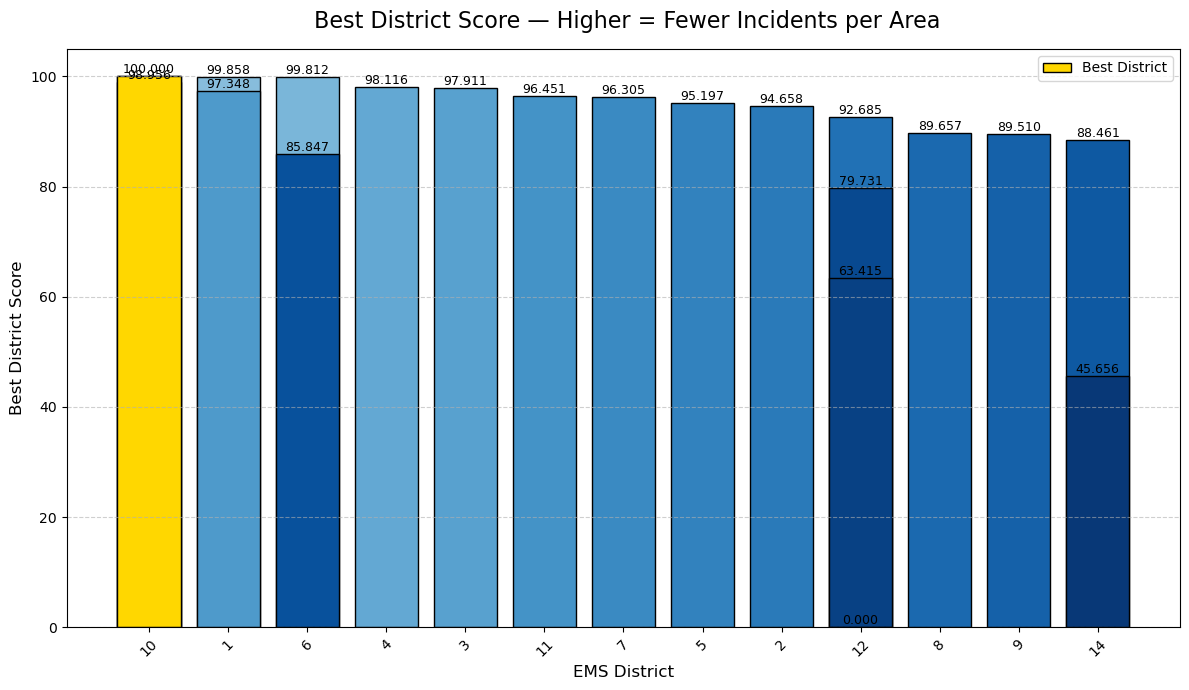

In [18]:
import matplotlib.pyplot as plt
import numpy as np

x = df_sorted['district'].astype(str)
y = df_sorted['best_district_score']

colors = plt.cm.Blues(np.linspace(0.4, 1, len(df_sorted)))

plt.figure(figsize=(12,7))
bars = plt.bar(x, y, color=colors, edgecolor='black')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.0002,
             f"{height:.3f}", ha='center', va='bottom', fontsize=9)


plt.title(" Best District Score — Higher = Fewer Incidents per Area", fontsize=16, pad=15)
plt.xlabel("EMS District", fontsize=12)
plt.ylabel("Best District Score", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)


best_idx = y.idxmax()
best_district = str(df_sorted.loc[best_idx, 'district'])
best_value = df_sorted.loc[best_idx, 'best_district_score']
plt.bar(best_district, best_value, color='gold', edgecolor='black', label='Best District')
plt.legend()

plt.tight_layout()
plt.show()


Step 4: Identify the Top District
Finally, above is a display summary of the top-performing EMS district based on my “Best District Score.”
This provides a quick overview of its safety characteristics, including incidents, area, and score.

In [8]:
top = df_sorted.iloc[0]

print(" **Best EMS District Summary**")
print(f"District Number: {int(top['district'])}")
print(f"Total Incidents (RAMS): {top['rams_']}")
print(f"Area (Square Miles): {top['sqmiles']:.2f}")
print(f"Incidents per Square Mile: {top['incidents_per_sqmi']:.2f}")
print(f"Best District Score (0–100): {top['best_district_score']:.1f}")


 **Best EMS District Summary**
District Number: 10
Total Incidents (RAMS): 2
Area (Square Miles): 4.67
Incidents per Square Mile: 0.43
Best District Score (0–100): 100.0


### Conclusion 
I found that that district 12 in Pittsburgh which was Allegheny County and they had the fewer incidents per square mile. I polled the top 13 districts because they were all super close in score. When choosing the overall best we went with Summer Hill because it was the best out of all of them. 


## Wage or Salary Income in the Past 12 Months


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Load Dataset get a feel for how it looks

In [16]:
# load in the data
data = pd.read_csv("wage-or-salary-income-in-the-past-12-months-for-households.csv", index_col="Neighborhood")

# look at the first ten rows of the data
data.head(10)

,Id,Estimate; Total:,Margin of Error; Total:,Estimate; Total: - With wage or salary income,Margin of Error; Total: - With wage or salary income,Estimate; Total: - No wage or salary income,Margin of Error; Total: - No wage or salary income
Neighborhood,,,,,,,
Allegheny Center,1,870.0,93.000000,635.0,91.000000,235.0,59.000000
Allegheny West,2,146.0,36.000000,119.0,35.000000,27.0,20.000000
Allentown,3,1069.0,132.457540,736.0,140.335313,333.0,97.493590
Arlington,4,701.0,104.465305,570.0,106.273233,131.0,45.199558
Arlington Heights,5,144.0,59.000000,99.0,60.000000,45.0,30.000000
Banksville,6,1946.0,229.222599,1564.0,216.584856,382.0,134.988888
Bedford Dwellings,7,723.0,53.000000,348.0,71.000000,375.0,75.000000
Beechview,8,3567.0,258.027130,2719.0,255.476026,848.0,149.207909
Beltzhoover,9,848.0,156.057682,556.0,128.152253,292.0,111.332834


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, Allegheny Center to Windgap
Data columns (total 7 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Id                                                    91 non-null     int64  
 1   Estimate; Total:                                      91 non-null     float64
 2   Margin of Error; Total:                               91 non-null     float64
 3   Estimate; Total: - With wage or salary income         91 non-null     float64
 4   Margin of Error; Total: - With wage or salary income  91 non-null     float64
 5   Estimate; Total: - No wage or salary income           91 non-null     float64
 6   Margin of Error; Total: - No wage or salary income    91 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 5.7+ KB


In [18]:
data.columns = ['Id', 'Estimate_Total', 'Margin_Error_Total','Estimate_With_Income', 'Margin_Error_With_Income',
                'Estimate_No_Income', 'Margin_Error_No_Income']

data.head()

,Id,Estimate_Total,Margin_Error_Total,Estimate_With_Income,Margin_Error_With_Income,Estimate_No_Income,Margin_Error_No_Income
Neighborhood,,,,,,,
Allegheny Center,1,870.0,93.000000,635.0,91.000000,235.0,59.000000
Allegheny West,2,146.0,36.000000,119.0,35.000000,27.0,20.000000
Allentown,3,1069.0,132.457540,736.0,140.335313,333.0,97.493590
Arlington,4,701.0,104.465305,570.0,106.273233,131.0,45.199558
Arlington Heights,5,144.0,59.000000,99.0,60.000000,45.0,30.000000


In [7]:
#make columns

data['Employment_Rate_Percent'] = (data['Estimate_With_Income'] / data['Estimate_Total']) * 100

data['With_Income_Error_Rate'] = (data['Margin_Error_With_Income'] / data['Estimate_With_Income']) * 100

In [8]:
data.head()

,Id,Estimate_Total,Margin_Error_Total,Estimate_With_Income,Margin_Error_With_Income,Estimate_No_Income,Margin_Error_No_Income,Employment_Rate_Percent,With_Income_Error_Rate
Neighborhood,,,,,,,,,
Allegheny Center,1,870.0,93.000000,635.0,91.000000,235.0,59.000000,72.988506,14.330709
Allegheny West,2,146.0,36.000000,119.0,35.000000,27.0,20.000000,81.506849,29.411765
Allentown,3,1069.0,132.457540,736.0,140.335313,333.0,97.493590,68.849392,19.067298
Arlington,4,701.0,104.465305,570.0,106.273233,131.0,45.199558,81.312411,18.644427
Arlington Heights,5,144.0,59.000000,99.0,60.000000,45.0,30.000000,68.750000,60.606061


Show a graph of neighborhoods with 80% or more employment. 

In [9]:
data['is_high_employment'] = data['Employment_Rate_Percent'] > 80

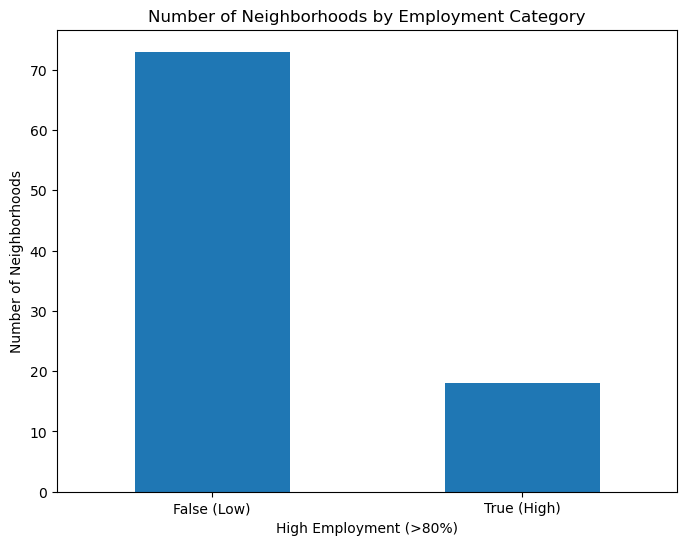

In [10]:
plt.figure(figsize=(8, 6))
data['is_high_employment'].value_counts().plot(kind='bar')
plt.title('Number of Neighborhoods by Employment Category')
plt.xlabel('High Employment (>80%)')
plt.ylabel('Number of Neighborhoods')
plt.xticks([0, 1], ['False (Low)', 'True (High)'], rotation=0)
plt.show()

In [11]:
high_employment_df = data[data['is_high_employment'] == True].sort_values('Employment_Rate_Percent', ascending=False)

if high_employment_df.index.name == 'Neighborhood' or any('neighborhood' in str(x).lower() for x in df.index[:3]):
    high_employment_df = high_employment_df.reset_index()
    print("Reset the index - 'Neighborhood' should now be a column")

print("=== HIGH EMPLOYMENT NEIGHBORHOODS ===")
print(f"Total high employment neighborhoods: {len(high_employment_df)}")
print("\nList of High Employment Neighborhoods:")
for idx, row in high_employment_df.iterrows():
    print(f"{row['Neighborhood']}: {row['Employment_Rate_Percent']:.1f}%")

Reset the index - 'Neighborhood' should now be a column
=== HIGH EMPLOYMENT NEIGHBORHOODS ===
Total high employment neighborhoods: 18

List of High Employment Neighborhoods:
South Shore: 100.0%
Fairywood: 100.0%
North Shore: 95.5%
Strip District: 92.9%
Friendship: 91.5%
Esplen: 86.6%
Central Oakland: 86.6%
Summer Hill: 85.5%
Mt. Oliver: 84.7%
Perry North: 82.1%
Shadyside: 82.0%
West End: 81.8%
Point Breeze: 81.5%
Allegheny West: 81.5%
Bloomfield: 81.5%
Arlington: 81.3%
Bluff: 80.4%
Banksville: 80.4%


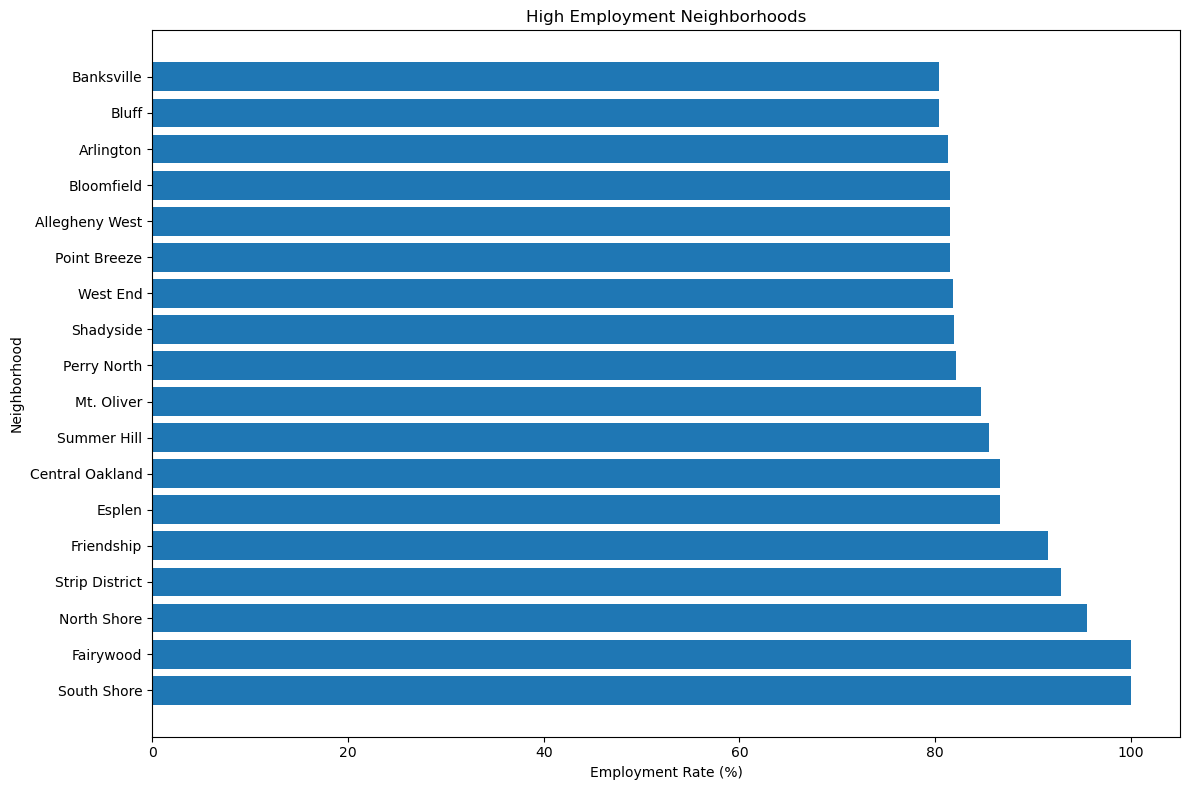

In [12]:
plt.figure(figsize=(12, 8))
plt.barh(high_employment_df['Neighborhood'], high_employment_df['Employment_Rate_Percent'])
plt.xlabel('Employment Rate (%)')
plt.ylabel('Neighborhood')
plt.title('High Employment Neighborhoods')
plt.tight_layout()
plt.show()

In [ ]:
Visual of the highest employment rates. 

Conclusion: Fairywood and South Shore have the highest employment rate

# Conclusion

Katie - I found from my dataset I found that Fairywood and South Shore have the highest employment rate. I kept the top scoring neighborhoods just in case it wasn't the top scoring on other metrics. We picked the highest scoring neighboorhood by looking at our top neighborhoods and we concluded that Summer Hill is the best neighborhood.

### Number or Crimes in Pittsburgh Neighborhoods

* Higher crime rates and levels of offense will decrease safety, reduce job opportunities and property values, and decrease a resident’s overall lifestyle and health.
    - People would be less likely to go outside and participate in community activities
    - Residents will experience more stress
* Business owners may be discouraged to open businesses in places with high crimes rates due to  safety reasons and loss of profit.
    - Less businesses opening in the neighborhood reduces the the number of job opportunities for residents.
    - Less access to different services 

#### A brief description of my code 
* I focused on two columns: Neighborhood (to indentify the location of the crime) and the Offense Type (to classify the type of the crime committed)
* I created a severity score system for the different types of offenses from 1 - 10 based on its impact on the victim and community 
    - Murder = 10 
    - Theft = 6
    - Disorderly Conduct = 2
* I totaled the severity of scores and the total number of crimes for each neighborhood 

In [14]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [15]:
criminal_monthly_activity = pd.read_csv("monthly-criminal-activity.csv", low_memory=False)

In [16]:
criminal_monthly_activity.head()

,_id,Report_Number,ReportedDate,ReportedTime,Hour,DayofWeek,ReportedMonth,NIBRS_Coded_Offense,NIBRS_Offense_Code,NIBRS_Offense_Category,NIBRS_Offense_Type,NIBRS_Crime_Against,NIBRS_Offense_Grouping,Violation,XCOORD,YCOORD,Zone,Tract,Neighborhood,Block_Address
0,1,PGHP24000024,2024-01-01,00:31,0,Monday,Jan,13A AGGRAVATED ASSAULT,13A,Assault Offenses,Aggravated Assault,Person,A,18 2718 A1 Strangulation Basic - Applying,-80.0268,40.3964,Zone 6,1919,Brookline,"2800 Block of FITZHUGH WAY Pittsburgh, PA"
1,2,PGHP24000024,2024-01-01,00:31,0,Monday,Jan,13C INTIMIDATION,13C,Assault Offenses,Intimidation,Person,A,18 2706 A1 Terroristic Threats-General,-80.0268,40.3964,Zone 6,1919,Brookline,"2800 Block of FITZHUGH WAY Pittsburgh, PA"
2,3,PGHP24000024,2024-01-01,00:31,0,Monday,Jan,90Z ALL OTHER OFFENSES,90Z,All other Offenses,All other Offenses,Group B,B,75 3733 A Fleeing or Attempting To Elude Polic...,-80.0268,40.3964,Zone 6,1919,Brookline,"2800 Block of FITZHUGH WAY Pittsburgh, PA"
3,4,PGHP24000024,2024-01-01,00:31,0,Monday,Jan,23H ALL OTHER LARCENY,23H,Larceny/Theft Offenses,All Other Larceny,Property,A,18 3921 A Theft by Unlawful Taking-Movable – L...,-80.0268,40.3964,Zone 6,1919,Brookline,"2800 Block of FITZHUGH WAY Pittsburgh, PA"
4,5,PGHP24000017,2024-01-01,00:21,0,Monday,Jan,9999 Vehicle Offense (Not NIBRS Reportable),999,Not NIBRS Reportable,Not NIBRS Reportable,Group B,B,LO 6 101 Discharge of Firearms Prohibited,-80.0243,40.4582,Zone 1,2107,Manchester,"1200 Block of COLUMBUS AVE Pittsburgh, PA"


In [17]:
# Number of unique of offense types 
print(criminal_monthly_activity["NIBRS_Offense_Type"].nunique())
# List of unique offense types 
print(criminal_monthly_activity["NIBRS_Offense_Type"].unique())

54
['Aggravated Assault' 'Intimidation' 'All other Offenses'
 'All Other Larceny' 'Not NIBRS Reportable' 'Theft from Building'
 'Drunkenness' 'Disorderly Conduct' 'Trespass of Real Property'
 'Simple Assault' 'Destruction/Damage/Vandalism of Property' 'Shoplifting'
 'Credit Card/ATM Fraud' 'Theft of Motor Vehicle Parts or Accessories'
 'False Pretenses/Swindle/Confidence Game' 'Weapon Law Violations'
 'Pocket-Picking' 'Drug Equipment Violations' 'Stolen Property Offenses'
 'Drug/Narcotic Violations' 'Robbery' 'Motor Vehicle Theft'
 'Forcible Sodomy' 'Burglary/Breaking & Entering'
 'Driving Under the Influence' 'Sexual Assault With An Object'
 'Theft from Motor Vehicle' 'Impersonation' 'Bad Checks'
 'Counterfeiting/Forgery' 'Forcible Rape' 'Statutory Rape'
 'Assisting or Promoting Prostitution' 'Arson'
 'Family Offenses, Nonviolent' 'Pornography/Obscene Material'
 'Curfew/Loiting/Vagrancy Violations' nan 'Forcible Fondling'
 'Purse-snatching' 'Involuntary Servitude' 'Kidnapping/Abductio

In [18]:
# Number of unique neighborhoods
print(criminal_monthly_activity["Neighborhood"].nunique())
# List of all the unique neighborhoods
print(criminal_monthly_activity["Neighborhood"].unique())

91
['Brookline' 'Manchester' 'Point Breeze North' 'South Side Flats'
 'North Shore' 'Greenfield' 'Homewood North' 'South Side Slopes'
 'Central Business District' nan 'East Liberty' 'North Oakland'
 'Squirrel Hill South' 'East Allegheny' 'Strip District'
 'Lincoln–Lemington–Belmar' 'Shadyside' 'Carrick' 'Point Breeze'
 'Morningside' 'Allentown' 'Crafton Heights' 'Mount Washington'
 'Crawford-Roberts' 'Marshall-Shadeland' 'Central Oakland' 'Elliott'
 'Brighton Heights' 'Central Lawrenceville' 'Summer Hill' 'South Oakland'
 'Homewood South' 'Knoxville' 'Terrace Village' 'West Oakland' 'Fineview'
 'Perry South' 'Upper Lawrenceville' 'Bluff' 'Sheraden'
 'Spring Hill–City View' 'Bloomfield' 'Beechview' 'Squirrel Hill North'
 'Garfield' 'Banksville' 'Bon Air' 'Northview Heights' 'Overbrook'
 'Larimer' 'Hazelwood' 'Friendship' 'Central Northside' 'Homewood West'
 'Lower Lawrenceville' 'East Carnegie' 'Bedford Dwellings'
 'Lincoln-Lemington-Belmar' 'New Homestead' 'Troy Hill' 'Highland Park'
 

In [19]:
# Remove empty rows in Neighborhood 
crimes = criminal_monthly_activity[criminal_monthly_activity["Neighborhood"] != " "]

# Remove "Not NIRBS reportable" from the NIBRS Offense Type
crimes = crimes[crimes["NIBRS_Offense_Type"] != "Not NIRBS Reportable"]

In [20]:
# Severity scores for each of the crimine/offense commited 
severity_score = {"Murder & Nonnegligent Manslaughter" : 10,
                  "Rape" : 10,
                  "Aggravated Assult" : 9, 
                  "Robbery" : 8,
                  "Simple Assult" : 7, 
                  "Burglary" : 6, 
                  "Intimidation" : 5,
                  "Theft from building" : 5, 
                  "Motor Vehicle Theft": 4,
                  "All other larcent" : 4, 
                  "Destruction/Damage/Vandalism of property": 3,
                  "Shoplifting" : 2,
                  "Credit card/ATM fraud": 2,
                  "Drunkness": 1,
                  "Disorderly conduct": 1,
                  "All other offenses": 2 }

# Adds a new column named "Severity" 
# Any NIRBS Offense Type that didn't match the key in the dictionary severity_score is given a score of 2
crimes["Severity"] = crimes["NIBRS_Offense_Type"].map(severity_score).fillna(2)

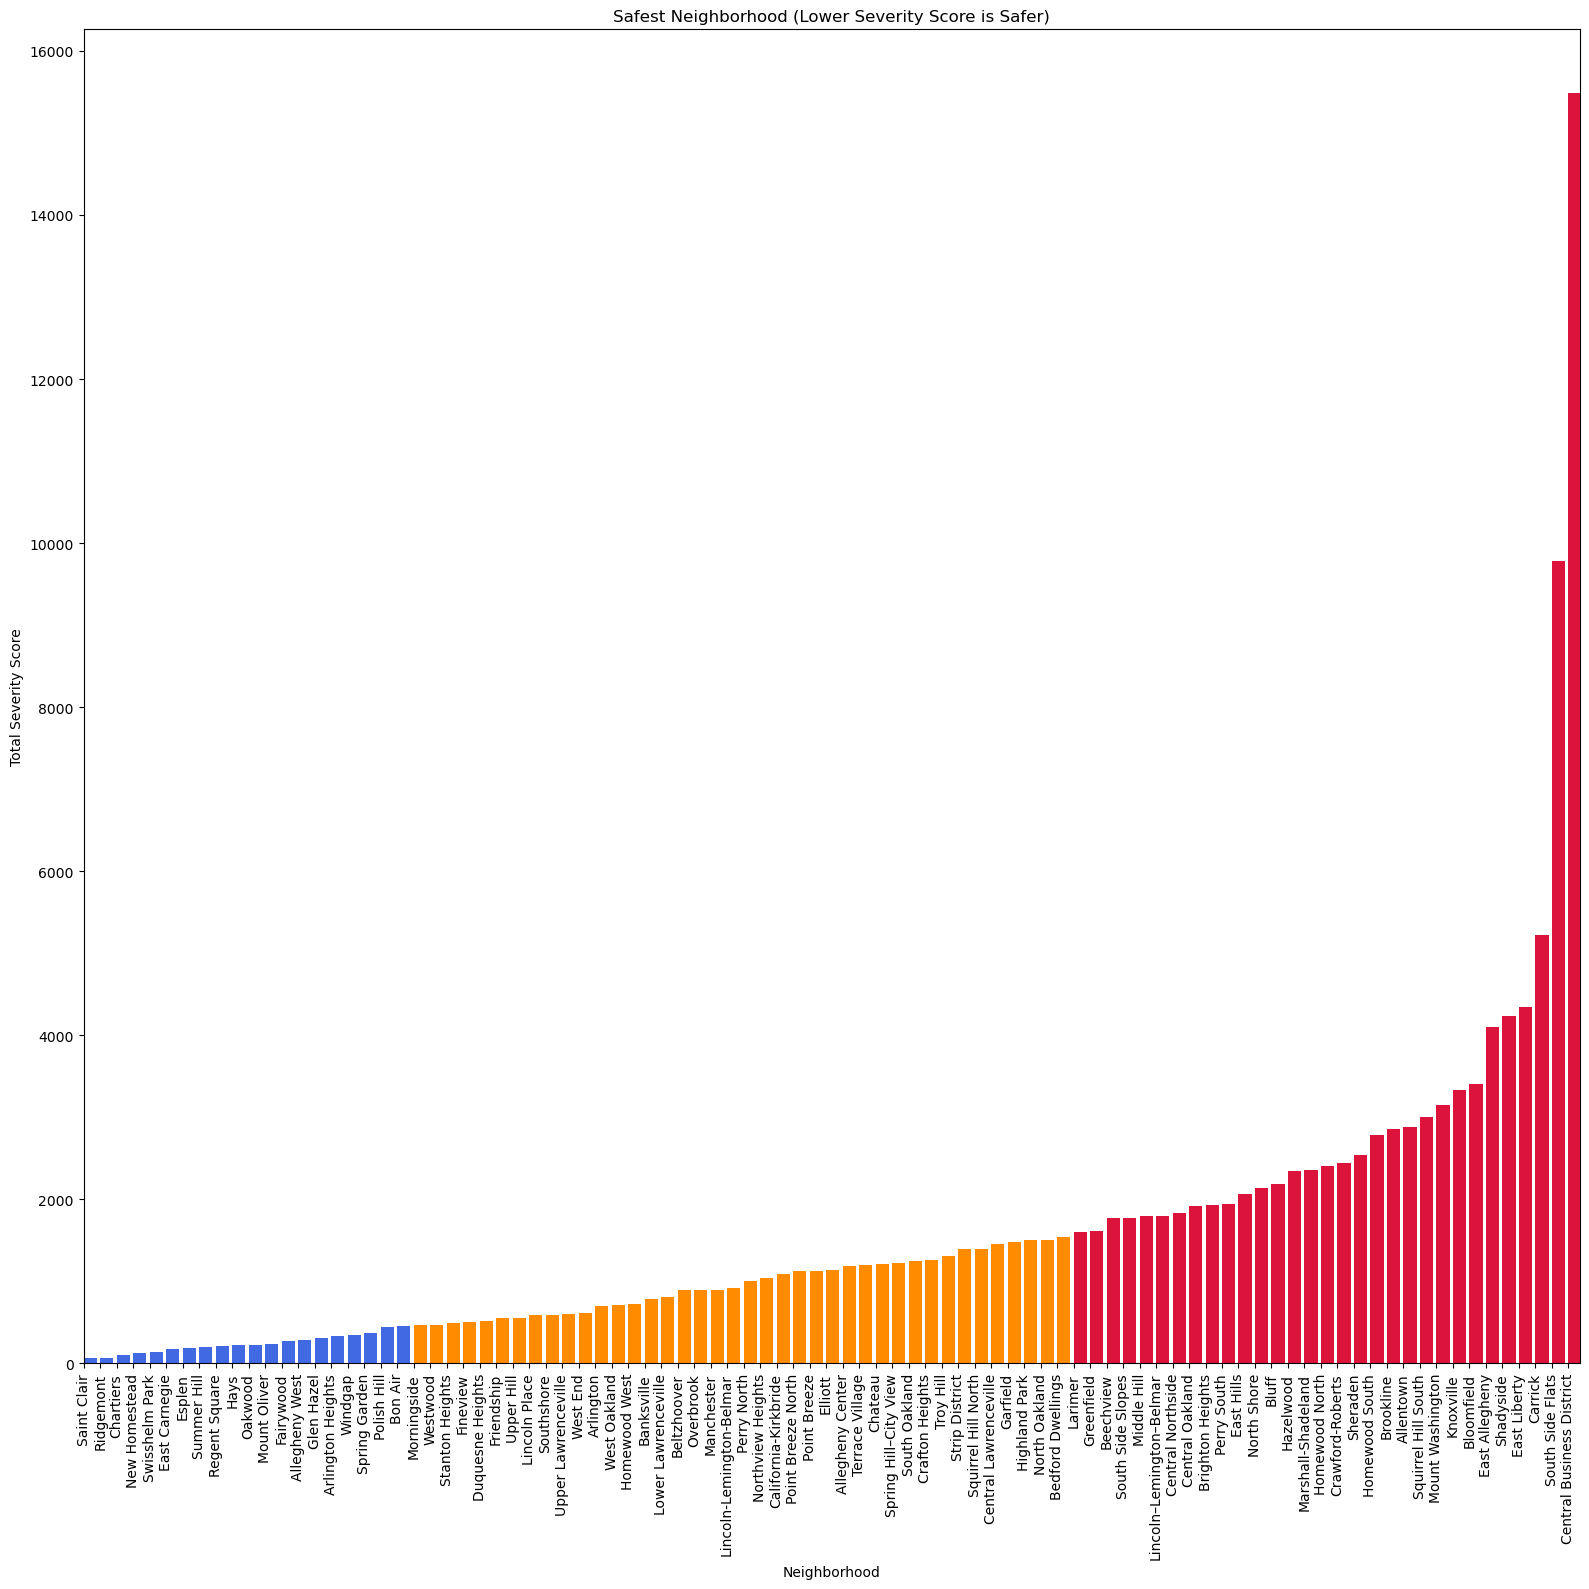

In [21]:
# Graph of all the neighborhoods
total_crime = crimes.groupby("Neighborhood").agg(Score = ("Severity", "sum"), Total_Crimes = ("Severity", "count")).reset_index()

# Sorts by total severity score
total_crime = total_crime.sort_values("Score")

colors = ["royalblue" if score <= 460 else "darkorange" if 460 < score <= 1600 else "crimson" for score in total_crime["Score"]]

plt.figure(figsize = (16, 16))
plt.bar(total_crime["Neighborhood"], total_crime["Score"], align = "edge", color = colors)
plt.xticks(rotation = 90)
plt.xlabel("Neighborhood")
plt.ylabel("Total Severity Score")
plt.xlim(0, len(total_crime)-0.3)
plt.title("Safest Neighborhood (Lower Severity Score is Safer)")
plt.tight_layout()
plt.show()

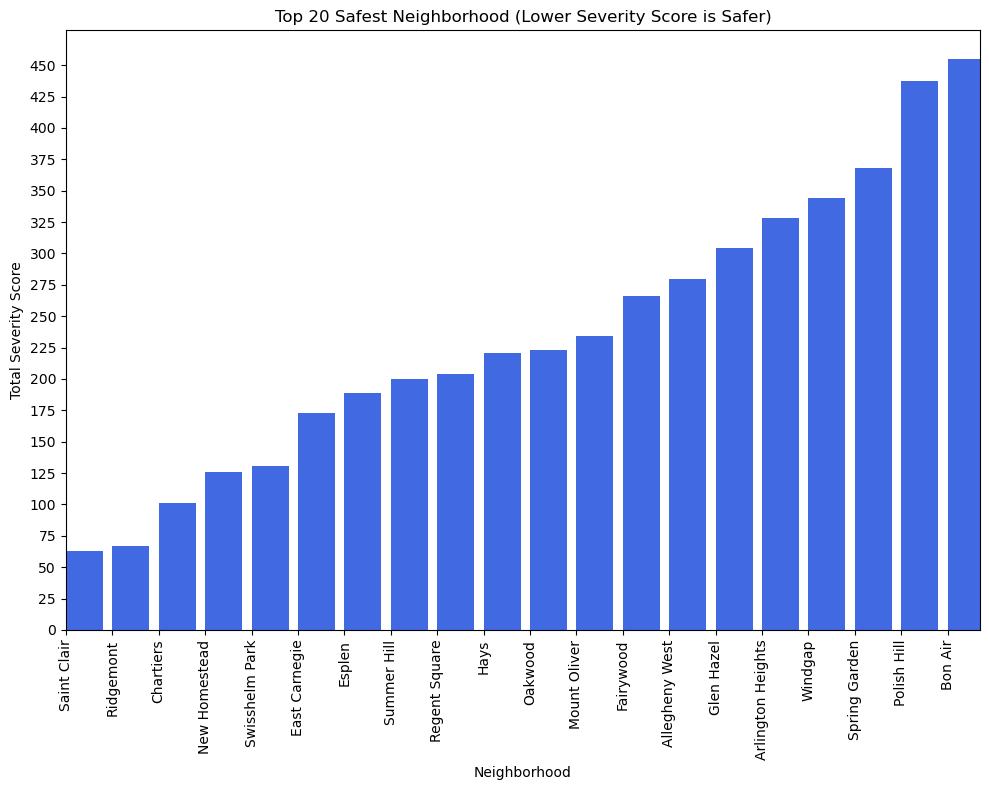

In [22]:
# Graph of top 20 safest neighborhood
total_crime = crimes.groupby("Neighborhood").agg(Score = ("Severity", "sum"), Total_Crimes = ("Severity", "count")).reset_index()

# Sorts by total severity score
total_crime = total_crime.sort_values("Score")

# Top 20 with the lowest severity score
top_20 = total_crime.head(20)

plt.figure(figsize = (10, 8))
plt.bar(top_20["Neighborhood"], top_20["Score"], align ="edge", color = "royalblue")
plt.xticks(rotation = 90)
plt.yticks(np.arange(0, 460, 25))
plt.xlabel("Neighborhood")
plt.ylabel("Total Severity Score")
plt.title("Top 20 Safest Neighborhood (Lower Severity Score is Safer)")
plt.xlim(0, len(top_20)-0.3)
plt.tight_layout()
plt.show()

In [23]:
print("Top 30 Safest Neighborhood")
total_crime = total_crime.sort_values("Score")
total_crime = total_crime.reset_index(drop = True)
total_crime.index = total_crime.index + 1
print(total_crime.head(30))

Top 30 Safest Neighborhood
           Neighborhood  Score  Total_Crimes
1           Saint Clair   63.0            25
2             Ridgemont   67.0            32
3             Chartiers  101.0            38
4         New Homestead  126.0            51
5        Swisshelm Park  131.0            61
6         East Carnegie  173.0            75
7                Esplen  189.0            79
8           Summer Hill  200.0            77
9         Regent Square  204.0            95
10                 Hays  221.0           100
11              Oakwood  223.0            84
12         Mount Oliver  234.0           104
13            Fairywood  266.0           107
14       Allegheny West  280.0           125
15           Glen Hazel  304.0           125
16    Arlington Heights  328.0           122
17              Windgap  344.0           144
18        Spring Garden  368.0           151
19          Polish Hill  437.0           192
20              Bon Air  455.0           207
21          Morningside  469

* The neighborhood with the lowest severity scores and number of crimes was **Saint Clair**

#### Conclusion 
The number and severity of crimes varied across all the neighborhoods in Pittsburgh. I chose to create a severity scoring system because solely counting the total number of crimes in a city would treat murder the same as robbery, which is not realistic. By implementing the severity scoring system and the total number of crimes, I determined the top 20 safest neighborhoods in Pittsburgh. Focusing on the severity and number of crimes is crucial not only for residents' immediate safety but also for their quality of life. Neighborhoods with many serious crimes discourage business development, reduce job opportunities, lower property value, and increase residents' overall mental and physical well-being. Knowing which neighborhood has a lower rate of serious crime is important for residents and business owners to make informed decisions about where to live and invest. 

### Final Result: The Best Neighborhood in Pittsburgh
##### The best neighborhood based on our metrics was **Summer Hill** 

* Wages and Salary: 8th place
    - 85% employment rate
* Incidents/sq mile: 2nd Place 
    - 99.5/100 for least incidents/sq mile
* Crime Rate: 8th place
    - 77 total crimes committed 
    - Severity Score of 200/16,000